# Load and process molecules with `rdkit`

This notebook does the following:
- Molecules downloaded in the [previous notebook](./ 1_Get_Molecular_libraries.ipynb) are processed using `rdkit`.

The output of this notebook is a the file `rdKit_db_molecules.obj`, which is a pandas data frame containing the rdkit object of each molecule.

In [1]:
import pandas as pd
import numpy as np
from glob import glob
from pathlib import Path
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*')
import sys
sys.path.append('../..')
from helper_modules.analyze_molecules_with_rdkit import *

## DEKOIS Molecules

In [3]:
sdf_input_path = './datasets/DEKOIS2/sdf/'

list_sdf_files = get_files_list(sdf_input_path, actives_name='ligand')
df_DEKOIS = get_mol_dataframe(load_molecules_from_dir(list_sdf_files))
df_DEKOIS.head()

,Activity,mol_rdk,sanitized
ligand_1,active,<rdkit.Chem.rdchem.Mol object at 0x7fed2b9cef80>,True
ligand_2,active,<rdkit.Chem.rdchem.Mol object at 0x7fed2b9df030>,True
ligand_3,active,<rdkit.Chem.rdchem.Mol object at 0x7fed2b9df080>,True
ligand_4,active,<rdkit.Chem.rdchem.Mol object at 0x7fed2b9df0d0>,True
ligand_5,active,<rdkit.Chem.rdchem.Mol object at 0x7fed2b9df120>,True


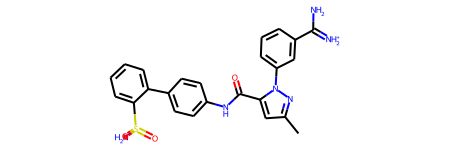

In [4]:
df_DEKOIS.loc['ligand_4', 'mol_rdk']

## DUD 2006

In [5]:
sdf_input_path = './datasets/DUD/sdf/'

list_sdf_files = get_files_list(sdf_input_path, actives_name='ligand')
df_DUD = get_mol_dataframe(load_molecules_from_dir(list_sdf_files))
df_DUD.head()

,Activity,mol_rdk,sanitized
ligand_1,active,<rdkit.Chem.rdchem.Mol object at 0x7fed2ba14f80>,True
ligand_2,active,<rdkit.Chem.rdchem.Mol object at 0x7fed2ba14ee0>,True
ligand_3,active,<rdkit.Chem.rdchem.Mol object at 0x7fed2ba14e40>,True
ligand_4,active,<rdkit.Chem.rdchem.Mol object at 0x7fed2ba14da0>,True
ligand_5,active,<rdkit.Chem.rdchem.Mol object at 0x7fed2ba14d00>,True


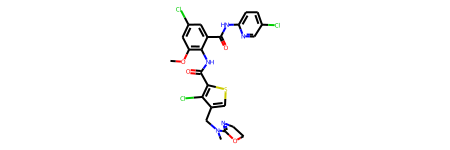

In [6]:
df_DUD.loc['ligand_4', 'mol_rdk']

## Cocrystalized molecules

In [7]:
# Path to SDF Files
sdf_input_path = './datasets/COCRYS/sdf/'
# Function to sort the molecules by their PDB id
sort_function = lambda x: x.split('/')[-1].split('_')[0]
# Get the list of files
list_sdf_files = get_files_list(sdf_input_path, 
                                actives_name='LIG', 
                                sufix='', 
                                sort_func = sort_function
                               )
# Compute a dataframe with the molecules as rdkit objects
df_pdi_lig = load_cocrys_molecules_from_dir(list_sdf_files)

# Update the dataframe
df_COCRYS = df_pdi_lig[['Lig', 'mol_rdk']]
df_COCRYS['Activity'] = 'active'
df_COCRYS['sanitized'] = [True if i != 'v3' else False for i in df_pdi_lig.validation]
df_COCRYS = df_COCRYS[['Lig', 'Activity', 'mol_rdk', 'sanitized']]
df_COCRYS = df_COCRYS.drop_duplicates('Lig').set_index('Lig')
df_COCRYS.sanitized.value_counts()
print('Shape', df_COCRYS.shape)
df_COCRYS.head()

Shape (128, 3)


,Activity,mol_rdk,sanitized
Lig,,,
RPR,active,<rdkit.Chem.rdchem.Mol object at 0x7fed2ba16800>,True
815,active,<rdkit.Chem.rdchem.Mol object at 0x7fed2ba168a0>,True
PR2,active,<rdkit.Chem.rdchem.Mol object at 0x7fed2ba16bc0>,True
DX9,active,<rdkit.Chem.rdchem.Mol object at 0x7fed2ba16f80>,True
Z34,active,<rdkit.Chem.rdchem.Mol object at 0x7fed2ba16940>,False


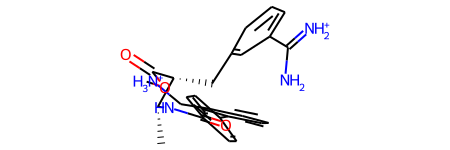

In [8]:
df_COCRYS.loc['RPR', 'mol_rdk']

## Merge all dataframes

In [9]:
list_dfs = [df_COCRYS, df_DEKOIS, df_DUD]
list_dfs_names = ['COCRYS', 'DEKOIS2', 'DUD']

# Create the final dataframe
df_all_libraries = pd.concat(list_dfs, keys = list_dfs_names)
df_all_libraries['Activity'] = df_all_libraries['Activity']\
                                    .replace({'active': 1, 'inactive': 0})

df_all_libraries

Activity                                           mol_rdk  \
       Lig                                                                      
COCRYS RPR           active  <rdkit.Chem.rdchem.Mol object at 0x7fed16b9dcf0>   
       815           active  <rdkit.Chem.rdchem.Mol object at 0x7fed16b9dd30>   
       PR2           active  <rdkit.Chem.rdchem.Mol object at 0x7fed16b9ddb0>   
       DX9           active  <rdkit.Chem.rdchem.Mol object at 0x7fed16b9de30>   
       Z34           active  <rdkit.Chem.rdchem.Mol object at 0x7fed16b9deb0>   
...                     ...                                               ...   
DEKOIS decoy_1196  inactive  <rdkit.Chem.rdchem.Mol object at 0x7fed16d097b0>   
       decoy_1197  inactive  <rdkit.Chem.rdchem.Mol object at 0x7fed16d09830>   
       decoy_1198  inactive  <rdkit.Chem.rdchem.Mol object at 0x7fed16d098b0>   
       decoy_1199  inactive  <rdkit.Chem.rdchem.Mol object at 0x7fed16d09930>   
       decoy_1200  inactive  <rdkit.Chem.rdchem.Mol object at 0x7fed16d099b0>   

                  sanitized  
       Lig                   
COCRYS RPR            False  
       815             True  
       PR2             True  
       DX9            False  
       Z34            False  
...                     ...  
DEKOIS decoy_1196      True  
       decoy_1197      True  
       decoy_1198      True  
       decoy_1199      True  
       decoy_1200      True  

[7259 rows x 3 columns]

In [10]:
# Save the dataframe
output_file = './rdKit_db_molecules.obj'
if not Path(output_file).exists():
    df_all_libraries.to_pickle(output_file)